# Task 1: Framework Research

The first research required to implement a model using Tensorflow is figuring out how the model will be structured. A model can be implemented either via the Sequential API, the Functional API, or model subclassing (1). I decided to take the model subclassing approach because I have prior experience with this implementation, but (1) notes that the Sequential API is the easiest version of building a model. \\
Because I chose the model subclassing approach, the next research to do is looking into the tf.keras.Model class (2). The documentation for this provides insight on how to subclass correctly and a list of possible methods to override or call. The most important out of these are the compile function, call function, and the fit and predict functions. The compile function initializes the model depending on various hyperparameters (optimizer used, learning rate, etc.). The call function is overridden to implement custom layers for the model, such as two Dense layers in the case of this project. And the fit and predict functions carry out the training and testing of the model. \\
An important aspect of compiling the model is passing in a loss function, which requires research of Tensorflow's built-in loss functions (3). The loss used for this project was the MeanSquaredError class for the linear regression (predicting the tempo) and the CategoricalCrossentropy class for the classification problem (predicting the song). \\
An important aspect of overriding the call function is doing research on what layers are provided by Tensorflow and what they represent. For this project, the correct layer to use is tf.keras.layers.Dense (4). This layer represents a single perceptron of a specified size, so using it twice creates a 2-layer neural network model. \\
Lastly, I conducted research on using regularization with Tensorflow. I learned that regularization can be applied on the layer level as a parameter, which is how I decided to use it.

References:


1. [Model Sub-Classing and Custom Training Loop from Scratch in TensorFlow 2](https://towardsdatascience.com/model-sub-classing-and-custom-training-loop-from-scratch-in-tensorflow-2-cc1d4f10fb4e)
2. [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
3. [Module: tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
4. [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
5. [tf.keras.regulazers.L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2)



#Task 2: Project

### Import libraries

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

import tensorflow as tf

### Load data

In [2]:
music_data = pd.read_csv('/content/features_3_sec.csv')

In [3]:
import re

music_data['filename'] = music_data['filename'].apply(lambda x: re.sub(r'.[0-9].wav', '', x))
len(music_data['filename'].unique())

1000

In [4]:
music_data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  blues.00000   66149          0.335406         0.091048  0.130405  0.003521   
1  blues.00000   66149          0.343065         0.086147  0.112699  0.001450   
2  blues.00000   66149          0.346815         0.092243  0.132003  0.004620   
3  blues.00000   66149          0.363639         0.086856  0.132565  0.002448   
4  blues.00000   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  ...  mfcc16_var  mfcc17_mean  mfcc17_var  \
0           117335.771563  ...   39.687145    -3.241280   36.488243   
1            65671.875673  ...   64.748276    -6.055294   40.677654   
2            75124.921716  ...   67.336563    -1.768610   28.348579   
3            82913.639269  ...   47.739452    -3.841155   28.337118   
4            60204.020268  ...   30.336359     0.664582   45.880913   

   mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  \
0     0.722209   38.099152    -5.050335   33.618073    -0.243027   43.771767   
1     0.159015   51.264091    -2.837699   97.030830     5.784063   59.943081   
2     2.378768   45.717648    -1.938424   53.050835     2.517375   33.105122   
3     1.218588   34.770935    -3.580352   50.836224     3.630866   32.023678   
4     1.689446   51.363583    -3.392489   26.738789     0.536961   29.146694   

   label  
0  blues  
1  blues  
2  blues  
3  blues  
4  blues  

[5 rows x 60 columns]

In [5]:
music_data.transpose()

0              1              2     \
filename                    blues.00000    blues.00000    blues.00000   
length                            66149          66149          66149   
chroma_stft_mean               0.335406       0.343065       0.346815   
chroma_stft_var                0.091048       0.086147       0.092243   
rms_mean                       0.130405       0.112699       0.132003   
rms_var                        0.003521        0.00145        0.00462   
spectral_centroid_mean      1773.065032    1816.693777    1788.539719   
spectral_centroid_var     167541.630869   90525.690866  111407.437613   
spectral_bandwidth_mean     1972.744388    2010.051501    2084.565132   
spectral_bandwidth_var    117335.771563   65671.875673   75124.921716   
rolloff_mean                3714.560359    3869.682242     3997.63916   
rolloff_var              1080789.885581  672244.760273  790712.679631   
zero_crossing_rate_mean        0.081851       0.087173       0.071383   
zero_crossing_rate_var         0.000558        0.00103       0.000425   
harmony_mean                  -0.000078      -0.000099      -0.000066   
harmony_var                    0.008354        0.00495       0.012476   
perceptr_mean                 -0.000068      -0.000103       0.000065   
perceptr_var                   0.005535       0.004854       0.004357   
tempo                        129.199219     123.046875     123.046875   
mfcc1_mean                  -118.627914    -125.590706     -132.44194   
mfcc1_var                   2440.286621    2038.344238    3798.532227   
mfcc2_mean                   125.083626     122.421227     115.085175   
mfcc2_var                    260.956909     216.774185     257.321289   
mfcc3_mean                   -23.443724     -20.718019     -14.811666   
mfcc3_var                    364.081726     231.979767     192.448074   
mfcc4_mean                    41.321484      50.128387      50.189293   
mfcc4_var                    181.694855     142.700409     144.166031   
mfcc5_mean                    -5.976108     -11.333302      -0.680819   
mfcc5_var                    152.963135     139.243118     128.376892   
mfcc6_mean                    20.115141      21.385401      24.650375   
mfcc6_var                     75.652298      77.817947       66.37117   
mfcc7_mean                    -16.04541     -15.960796     -13.506104   
mfcc7_var                     40.227104      97.364029      89.319336   
mfcc8_mean                    17.855198      19.454103      15.643386   
mfcc8_var                     84.320282      57.948093      55.253967   
mfcc9_mean                   -14.633434     -12.465918     -13.216637   
mfcc9_var                     83.437233      68.271523     120.308784   
mfcc10_mean                   10.270527      17.898169      10.406025   
mfcc10_var                    97.001335      56.222176      35.757862   
mfcc11_mean                   -9.708279     -11.732554      -7.991465   
mfcc11_var                    66.669891      54.373909      47.911613   
mfcc12_mean                   10.183875          8.145      11.853963   
mfcc12_var                    45.103611      40.662876      36.569931   
mfcc13_mean                   -4.681614      -7.717751      -4.677677   
mfcc13_var                    34.169498      30.808521      40.725075   
mfcc14_mean                    8.417439        8.39715        6.57111   
mfcc14_var                    48.269444      48.784225      30.686846   
mfcc15_mean                   -7.233477      -8.300493       -2.42475   
mfcc15_var                    42.770947      68.584824      50.313499   
mfcc16_mean                   -2.853603       4.074709        4.80628   
mfcc16_var                    39.687145      64.748276      67.336563   
mfcc17_mean                    -3.24128      -6.055294       -1.76861   
mfcc17_var                    36.488243      40.677654      28.348579   
mfcc18_mean                    0.722209       0.159015       2.378768   
mfcc18_var          

#### Feature descriptions:
 * chroma_stft - attributes of a sound signal \
 * rms - root mean square, measures average loudness \
 * spectral centroid - weighted mean of frequencies present in a sound \
 * spectral bandwidth - range of sprectral centroid \
 * rolloff - shape of the signal, represents frequency that has specified amount of total spectral energy below it \
 * zero crossing rate - rate at which signal changes between positive and negative \
 * harmony - sound color \
 * perceptrual - sound rhythm and emotion \
 * tempo - BPM \
 * mfcc - describe overall shape of spectral envelope, models characteristic of human voice

Source: [Work with w/ Audio Data: Visualise, Classify, Recommend](https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend/notebook#Explore-Audio-Data) (Kaggle Notebook)

## Task 2.1: Exploratory Data Analysis (EDA)

In [6]:
# length has 1 unique value
# scale all features to maintain same std across features
# generally extreme values for variance
music_data.describe().transpose()

count          mean           std           min  \
length                   9990.0  6.614900e+04  0.000000e+00  6.614900e+04   
chroma_stft_mean         9990.0  3.795341e-01  9.046576e-02  1.071078e-01   
chroma_stft_var          9990.0  8.487615e-02  9.636622e-03  1.534475e-02   
rms_mean                 9990.0  1.308591e-01  6.854539e-02  9.534877e-04   
rms_var                  9990.0  2.676388e-03  3.585628e-03  4.379535e-08   
spectral_centroid_mean   9990.0  2.199219e+03  7.518606e+02  4.727416e+02   
spectral_centroid_var    9990.0  4.166727e+05  4.349644e+05  8.118813e+02   
spectral_bandwidth_mean  9990.0  2.241386e+03  5.438544e+02  4.991629e+02   
spectral_bandwidth_var   9990.0  1.182711e+05  1.013505e+05  1.183520e+03   
rolloff_mean             9990.0  4.566077e+03  1.642065e+03  6.583363e+02   
rolloff_var              9990.0  1.628790e+06  1.489398e+06  1.145102e+03   
zero_crossing_rate_mean  9990.0  1.025785e-01  4.565119e-02  1.352539e-02   
zero_crossing_rate_var   9990.0  2.620121e-03  3.613560e-03  5.022605e-06   
harmony_mean             9990.0 -3.646305e-04  1.699439e-03 -2.667214e-02   
harmony_var              9990.0  1.259757e-02  1.263324e-02  9.312309e-23   
perceptr_mean            9990.0 -3.955016e-04  1.107822e-03 -8.793931e-03   
perceptr_var             9990.0  5.601553e-03  6.653225e-03  4.672045e-08   
tempo                    9990.0  1.248877e+02  3.291168e+01  2.437721e+01   
mfcc1_mean               9990.0 -1.454246e+02  1.064564e+02 -6.621716e+02   
mfcc1_var                9990.0  2.808904e+03  2.596257e+03  2.519054e+01   
mfcc2_mean               9990.0  1.009882e+02  3.467318e+01 -1.205339e+01   
mfcc2_var                9990.0  5.887954e+02  4.597052e+02  9.665931e+00   
mfcc3_mean               9990.0 -9.995014e+00  2.397252e+01 -1.042498e+02   
mfcc3_var                9990.0  3.741376e+02  2.944706e+02  2.055229e+00   
mfcc4_mean               9990.0  3.724372e+01  1.780446e+01 -3.513849e+01   
mfcc4_var                9990.0  1.839113e+02  1.331643e+02  3.540373e+00   
mfcc5_mean               9990.0 -2.009099e+00  1.356872e+01 -4.788678e+01   
mfcc5_var                9990.0  1.438177e+02  1.092726e+02  9.754141e+00   
mfcc6_mean               9990.0  1.539544e+01  1.265251e+01 -3.488926e+01   
mfcc6_var                9990.0  1.077844e+02  7.590040e+01  5.267811e+00   
mfcc7_mean               9990.0 -5.823034e+00  1.108870e+01 -4.518702e+01   
mfcc7_var                9990.0  9.850516e+01  6.553668e+01  7.561506e+00   
mfcc8_mean               9990.0  1.076666e+01  1.112301e+01 -4.032347e+01   
mfcc8_var                9990.0  7.479502e+01  4.588127e+01  6.899100e+00   
mfcc9_mean               9990.0 -7.569825e+00  9.368422e+00 -3.945175e+01   
mfcc9_var                9990.0  7.430931e+01  4.473301e+01  8.252314e+00   
mfcc10_mean              9990.0  8.283669e+00  8.841558e+00 -3.283355e+01   
mfcc10_var               9990.0  6.880400e+01  4.186420e+01  7.584913e+00   
mfcc11_mean              9990.0 -6.504168e+00  7.821168e+00 -4.000819e+01   
mfcc11_var               9990.0  6.381268e+01  4.021836e+01  4.998892e+00   
mfcc12_mean              9990.0  4.936315e+00  7.563187e+00 -2.375920e+01   
mfcc12_var               9990.0  5.779041e+01  3.748101e+01  2.345633e+00   
mfcc13_mean              9990.0 -5.186272e+00  7.132049e+00 -2.935050e+01   
mfcc13_var               9990.0  5.713039e+01  3.574654e+01  7.806118e+00   
mfcc14_mean              9990.0  2.164629e+00  6.084283e+00 -2.339009e+01   
mfcc14_var               9990.0  5.406934e+01  3.771559e+01  3.230073e+00   
mfcc15_mean              9990.0 -4.175271e+00  5.929457e+00 -3.046709e+01   
mfcc15_var               9990.0  5.267828e+01  3.725197e+01  1.481917e+00   
mfcc16_mean              9990.0  1.448240e+00  5.735149e+00 -2.685002e+01   
mfcc16_var               9990.0  4.998876e+01  3.444282e+01  1.325786e+00   
mfcc17_mean              9990.0 -4.198706e+00  5.677379e+00 -2.780980e+01   
mfcc17_var            

In [7]:
# No null values in the data
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
scale_features = ['spectral_centroid', 'spectral_bandwidth', 'rolloff', 'rms',
                  'rolloff', 'zero_crossing_rate', 'harmony', 'perceptr', 'chroma_stft']
scale_features += ['mfcc%d' % i for i in range(1, 21)]
scale_features

In [9]:
# Split data into mean and var features for simpler analysis
mean_cols = list(filter(lambda x: x[-4:] == 'mean', music_data.columns.to_list()))
var_cols = list(filter(lambda x: x[-3:] == 'var', music_data.columns.to_list()))
mean_data = music_data.drop(columns=var_cols+['filename', 'length'])
var_data = music_data.drop(columns=mean_cols+['filename', 'length'])

print(mean_data.columns)
print(var_data.columns)

Index(['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean',
       'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
       'harmony_mean', 'perceptr_mean', 'tempo', 'mfcc1_mean', 'mfcc2_mean',
       'mfcc3_mean', 'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean',
       'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean',
       'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean', 'label'],
      dtype='object')
Index(['chroma_stft_var', 'rms_var', 'spectral_centroid_var',
       'spectral_bandwidth_var', 'rolloff_var', 'zero_crossing_rate_var',
       'harmony_var', 'perceptr_var', 'tempo', 'mfcc1_var', 'mfcc2_var',
       'mfcc3_var', 'mfcc4_var', 'mfcc5_var', 'mfcc6_var', 'mfcc7_var',
       'mfcc8_var', 'mfcc9_var', 'mfcc10_var', 'mfcc11_var', 'mfcc12_var',
       'mfcc13_var', 'mfcc14_var', 'mfcc15_var', 'mfcc16_var', 'mfcc17_var',
       'mfcc18_var', 'mfc

### Correlation analysis

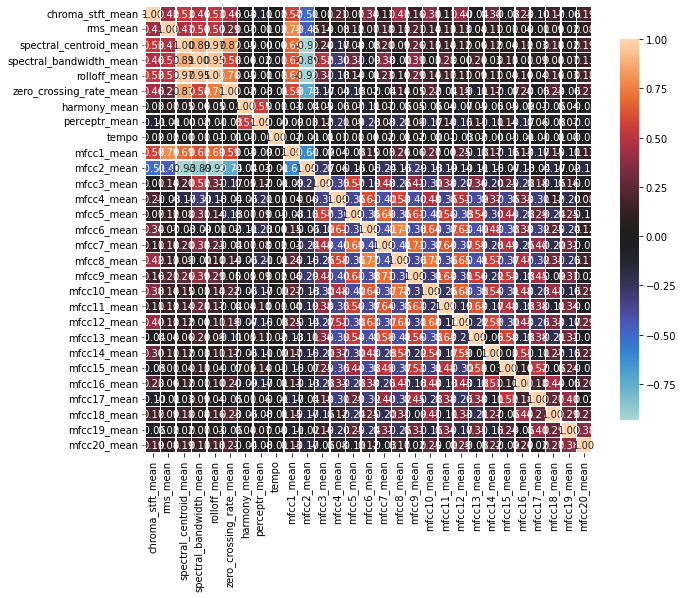

In [10]:
# Source for correlation heatmap code:
# https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mean_data.corr(), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

plt.show()

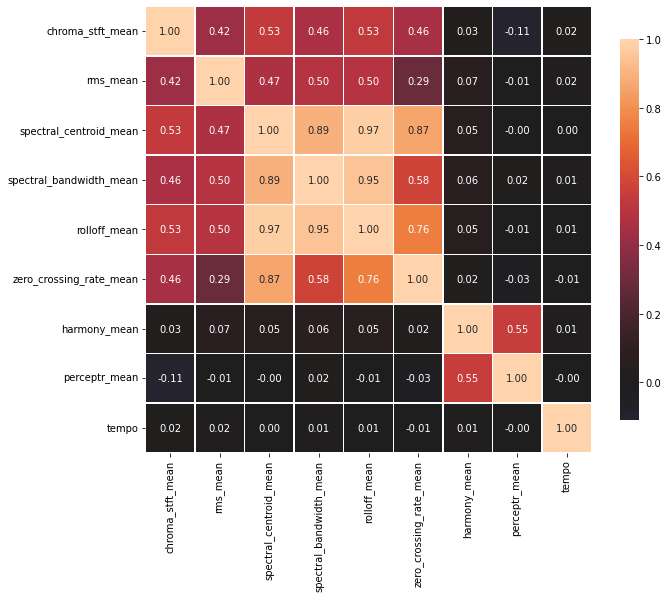

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mean_data.drop(columns=['mfcc%d_mean' % i for i in range(1, 21)]).corr(),
            vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

plt.show()

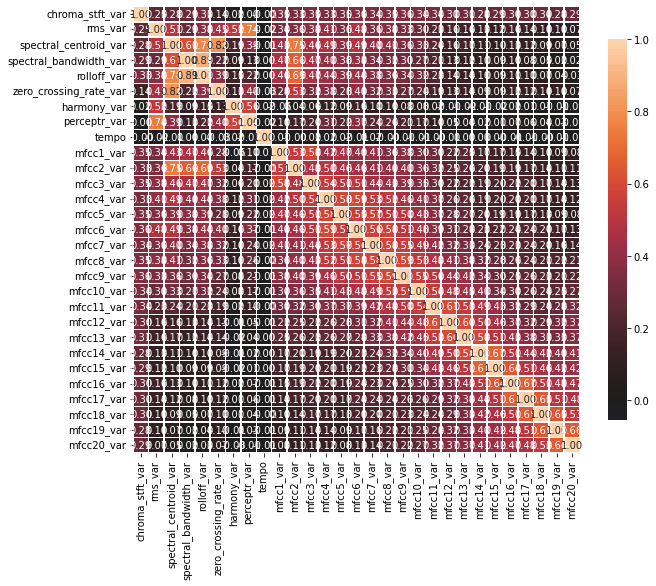

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(var_data.corr(), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

plt.show()

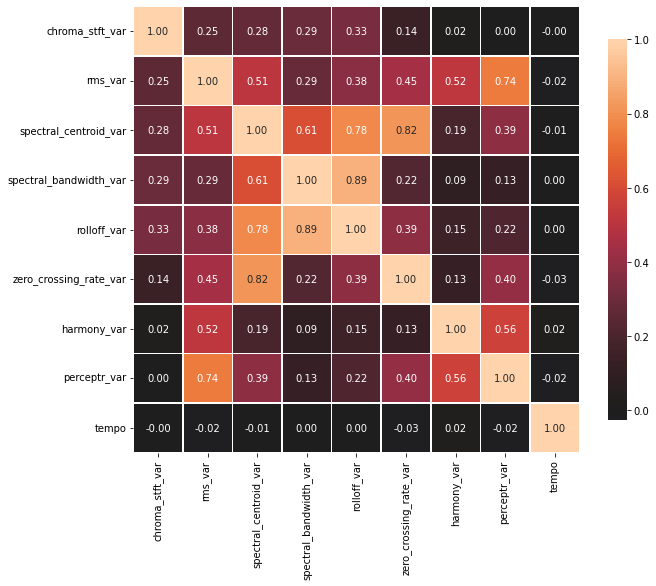

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(var_data.drop(columns=['mfcc%d_var' % i for i in range(1, 21)]).corr(),
            vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

plt.show()

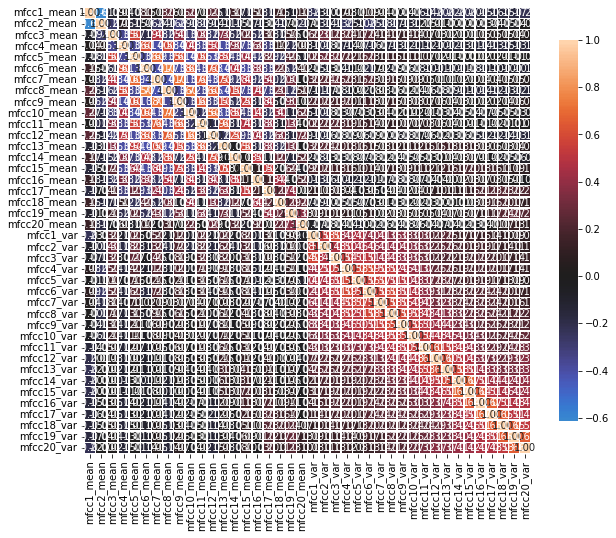

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(music_data[['mfcc%d_mean' % i for i in range(1, 21)] + ['mfcc%d_var' % i for i in range(1, 21)]].corr(),
            vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

plt.show()

### Pairplot

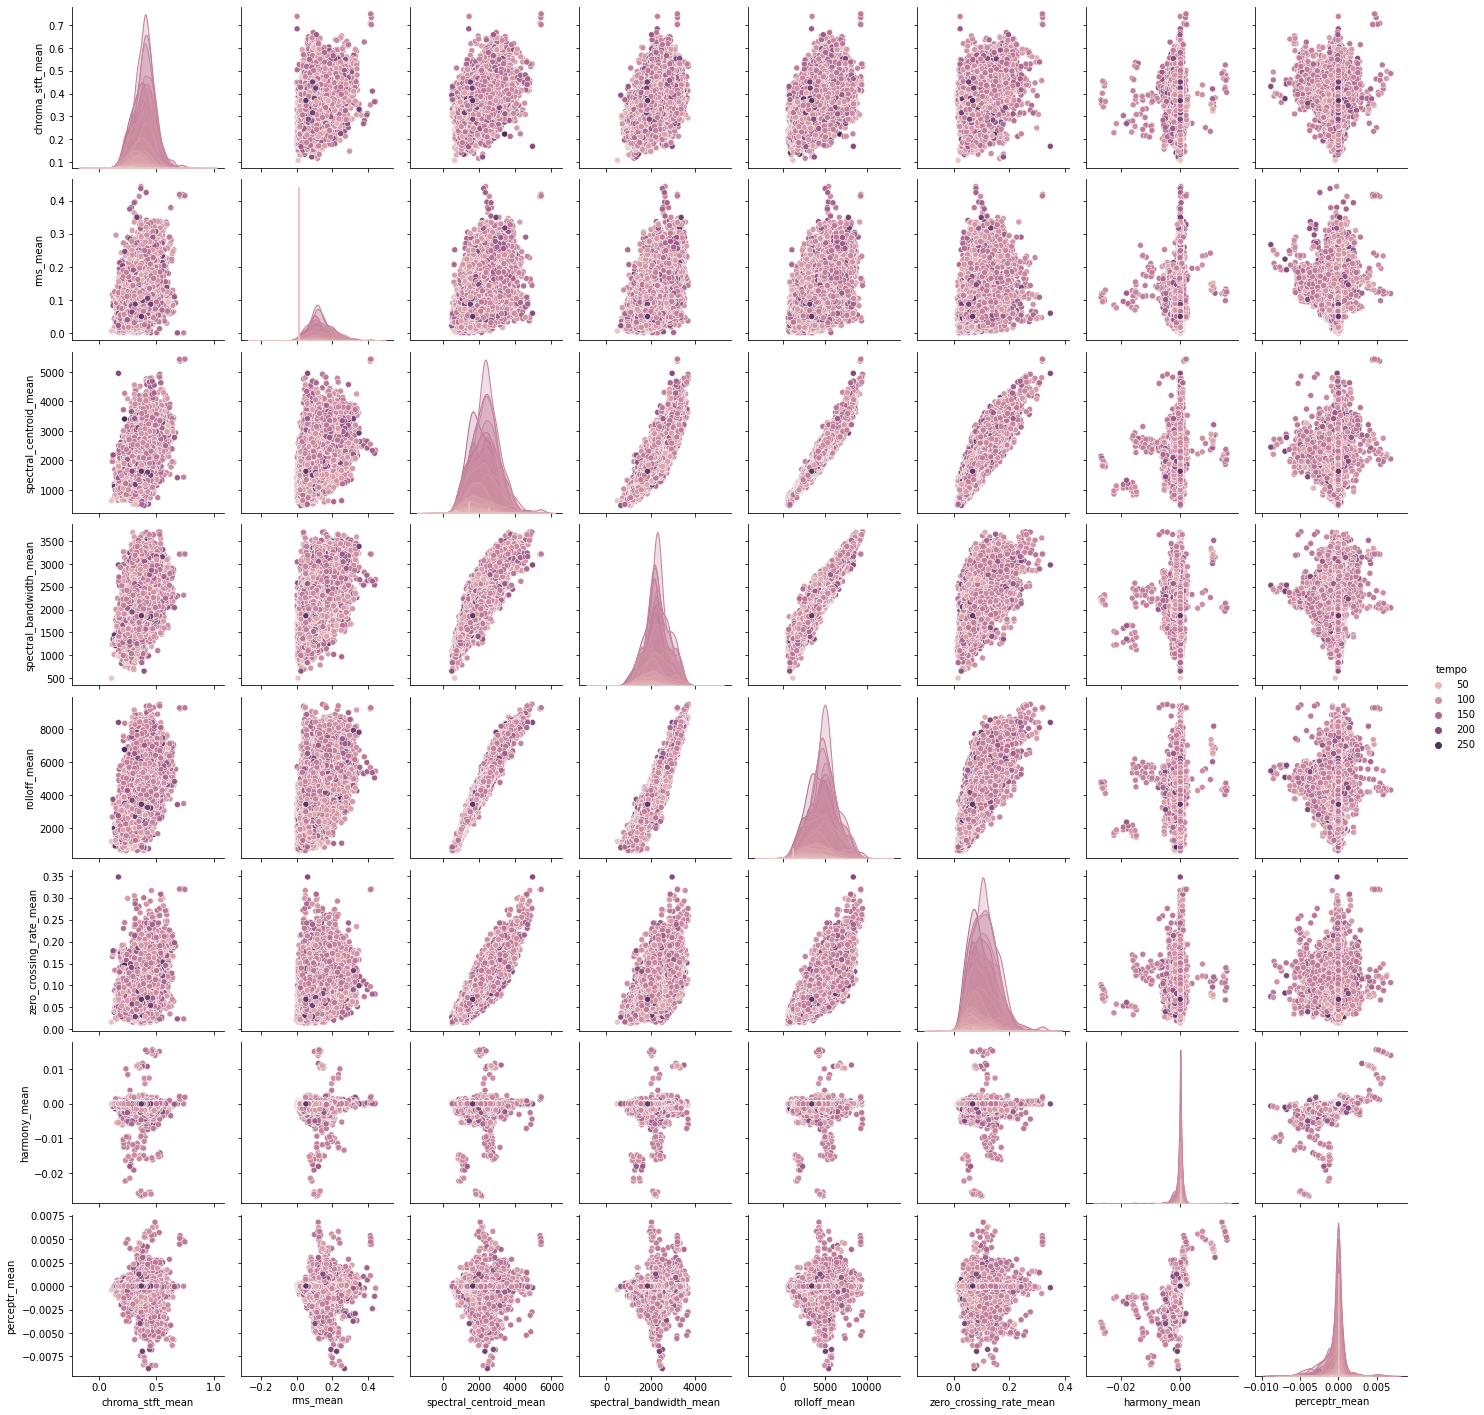

In [15]:
# Distribution graph
sns.pairplot(mean_data.drop(columns=['mfcc%d_mean' % i for i in range(1, 21)]), hue='tempo')

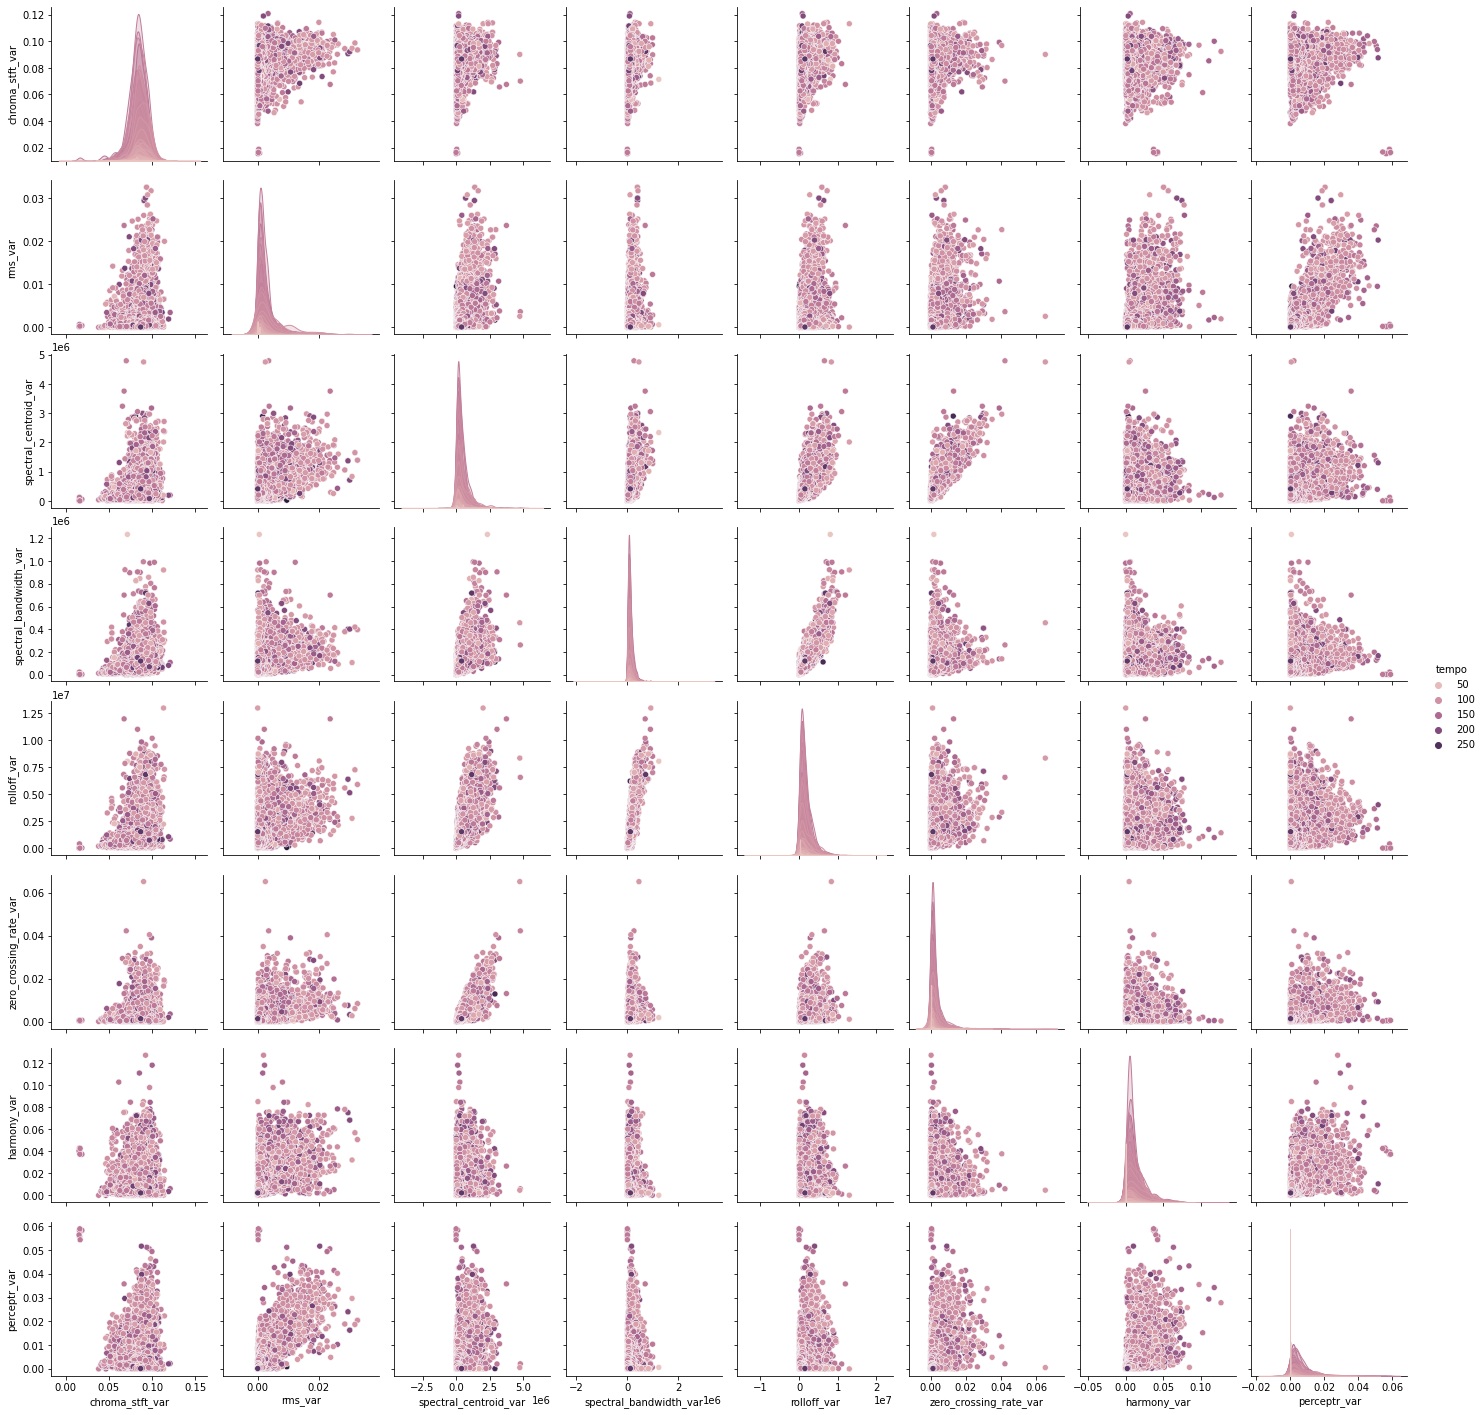

In [16]:
sns.pairplot(var_data.drop(columns=['mfcc%d_var' % i for i in range(1, 21)]), hue='tempo')

### Label Distribution

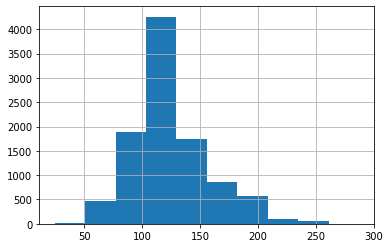

In [17]:
music_data['tempo'].hist()

In [35]:
from sklearn.preprocessing import StandardScaler

# Prepare data for model
scaler = StandardScaler()

new_music_data = pd.get_dummies(music_data, columns=['filename'], prefix='', prefix_sep='')
scale_columns = [f+'_mean' for f in scale_features] + [f+'_var' for f in scale_features]
new_music_data[scale_columns] = scaler.fit_transform(new_music_data[scale_columns])
final_data = new_music_data.drop(columns=['length', 'label'])

In [36]:
final_data.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0         -0.487808         0.640520 -0.006624  0.235568   
1         -0.403142         0.131835 -0.264944 -0.342134   
2         -0.361694         0.764491  0.016695  0.542195   
3         -0.175714         0.205477  0.024885 -0.063820   
4         -0.485895         0.337521  0.181345 -0.272072   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               -0.566828              -0.572791                -0.493983   
1               -0.508798              -0.749862                -0.425382   
2               -0.546245              -0.701852                -0.288365   
3               -0.723482              -0.700599                -0.517344   
4               -0.756246              -0.774827                -0.538557   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  rock.00090  \
0               -0.009229     -0.518590    -0.367952  ...           0   
1               -0.519010     -0.424118    -0.642268  ...           0   
2               -0.425734     -0.346190    -0.562723  ...           0   
3               -0.348881     -0.607665    -0.474804  ...           0   
4               -0.572962     -0.667537    -0.683920  ...           0   

   rock.00091  rock.00092  rock.00093  rock.00094  rock.00095  rock.00096  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   rock.00097  rock.00098  rock.00099  
0           0           0           0  
1           0           0           0  
2           0           0           0  
3           0           0           0  
4           0           0           0  

[5 rows x 1057 columns]

## Task 2.2: Train-dev-test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
song_columns = []
for c in final_data.columns:
    if re.match(r'.*.[0-9]+$', c):
        song_columns.append(c)

In [ ]:
song_columns

**Only run one or the other of the following two cells**

In [121]:
# DON'T USE THIS CELL
# If using songs as the label

X_train, X_test, y_train, y_test = train_test_split(final_data.drop(columns=song_columns), final_data[song_columns], test_size=0.15)
#X_train.head()

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33)
X_val.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
1429          0.234065         0.083572  0.082603  0.002248   
2415          0.415409         0.083278  0.115202  0.000535   
9643          0.406931         0.077211  0.123121  0.001513   
3476          0.421255         0.080109  0.110479  0.001819   
8485          0.361098         0.086503  0.129435  0.001990   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
1429                0.160336               0.005509                 0.289152   
2415                0.389732               0.077212                 0.709344   
9643                0.375187               0.017460                 0.480932   
3476                0.421932               0.038439                 0.482846   
8485                0.377315               0.084831                 0.729428   

      spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
1429                0.014623      0.155648     0.009055  ...     0.400215   
2415                0.095282      0.542924     0.147533  ...     0.356815   
9643                0.029394      0.441420     0.033925  ...     0.491568   
3476                0.061029      0.460321     0.069895  ...     0.431653   
8485                0.177605      0.552164     0.217929  ...     0.258124   

      mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
1429    0.068480     0.430698    0.228602     0.465315    0.124960   
2415    0.051750     0.269381    0.049855     0.288644    0.029809   
9643    0.026757     0.324848    0.049664     0.489660    0.021551   
3476    0.062498     0.325851    0.094922     0.468978    0.103839   
8485    0.051591     0.328031    0.042100     0.312108    0.045662   

      mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
1429     0.440810    0.046086     0.402537    0.140716  
2415     0.300276    0.015120     0.394859    0.020033  
9643     0.324515    0.022211     0.455658    0.042363  
3476     0.454484    0.048777     0.547812    0.109750  
8485     0.438816    0.016148     0.458561    0.027134  

[5 rows x 57 columns]

In [40]:
# If using tempo as the label

X_train, X_test, y_train, y_test = train_test_split(final_data.drop(columns=song_columns+['tempo']), final_data['tempo'], test_size=0.15)
#X_train.head()

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33)
X_val.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
952          -0.444023         0.631217  0.752451 -0.352962   
5880         -1.391240         1.243512 -0.695841 -0.235724   
5253         -1.066001         1.321232 -1.654796 -0.599978   
4214          0.780298        -0.253674  0.812194  0.775554   
186          -1.122075         1.542612 -0.956877 -0.364512   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
952                -1.055017               1.686160                -0.909425   
5880                0.667104              -0.185591                 1.858111   
5253               -0.670416              -0.143499                -0.167399   
4214               -0.309853              -0.532586                 0.016869   
186                -0.748577              -0.664676                -0.297310   

      spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
952                 1.571207     -1.180602     1.594346  ...    -0.334274   
5880                0.306131      1.438191     0.539589  ...    -1.210764   
5253                2.680359     -0.260544     1.132255  ...    -1.493458   
4214               -0.566047     -0.021917    -0.443365  ...     0.213760   
186                 0.217453     -0.461544    -0.270607  ...     0.921210   

      mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
952     0.777517     0.658231    0.545845    -1.474304    0.892715   
5880    1.984307     0.869091    0.558716     0.479049   -0.179215   
5253    0.320765     0.345978   -0.012178    -0.195531    1.340192   
4214   -0.657641     0.487829    0.241084     1.342447    0.366715   
186     0.667841     2.174504    4.457991     1.871140    4.785599   

      mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
952     -0.649797    0.041909    -1.602959    0.958460  
5880     0.755315    0.850758    -2.127573    1.816672  
5253     1.078202    0.094782     0.232095    4.341889  
4214     0.921468   -0.144234     0.180895    0.179422  
186      1.754729    2.050396     0.283620    0.722303  

[5 rows x 56 columns]

## Task 2.3: Neural Network

### Classification Model (predicting song) (decided not to use this model because of poor performance)

In [122]:
class NN_Model(tf.keras.Model):
    def __init__(self):
        super(NN_Model, self).__init__()
        # in the song classification problem, use 500, 1000 for layers size
        self.dense = tf.keras.layers.Dense(1000, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.output_layer = tf.keras.layers.Dense(1000, activation='softmax')

    def call(self, input_data, training=True):
        output = self.dense(input_data)
        output = self.dropout(output, training=training)
        output = self.output_layer(output)

        return output

In [125]:
model = NN_Model()
model.compile(
		optimizer=tf.keras.optimizers.Adamax(learning_rate=0.2),
		loss=tf.keras.losses.CategoricalCrossentropy(),
		metrics=[tf.keras.metrics.CategoricalAccuracy()]
	)

In [126]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
266/266 [==============================] - 5s 16ms/step - loss: 8.8720 - categorical_accuracy: 8.2440e-04 - val_loss: 7.1514 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
266/266 [==============================] - 4s 15ms/step - loss: 7.0085 - categorical_accuracy: 0.0011 - val_loss: 7.0579 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
266/266 [==============================] - 4s 15ms/step - loss: 6.9787 - categorical_accuracy: 0.0011 - val_loss: 7.0443 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
266/266 [==============================] - 4s 15ms/step - loss: 6.9739 - categorical_accuracy: 0.0011 - val_loss: 7.0379 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
266/266 [==============================] - 4s 15ms/step - loss: 6.9734 - categorical_accuracy: 9.4217e-04 - val_loss: 7.0352 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
266/266 [==============================] - 4s 15ms/step - loss: 6.9723 - categorical_accuracy: 4.7109e-04 - val_loss: 7.0344 -

### Linear Regression Model (predicting tempo)



In [56]:
class NN_Model(tf.keras.Model):
    def __init__(self):
        super(NN_Model, self).__init__()
        # in the song classification problem, use 500, 1000 for layers size
        self.dense = tf.keras.layers.Dense(200, activation='relu', kernel_regularizer='l2')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.output_layer = tf.keras.layers.Dense(1, activation='linear')

    def call(self, input_data, training=True):
        output = self.dense(input_data)
        output = self.dropout(output, training=training)
        output = self.output_layer(output)

        return output

In [75]:
model = NN_Model()
model.compile(
		optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
		loss=tf.keras.losses.MeanSquaredError(),
		metrics=[tf.keras.metrics.MeanAbsoluteError()]
	)

In [76]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
266/266 [==============================] - 2s 6ms/step - loss: 3421.5232 - mean_absolute_error: 44.5581 - val_loss: 1471.7614 - val_mean_absolute_error: 29.5439
Epoch 2/200
266/266 [==============================] - 1s 2ms/step - loss: 1426.5669 - mean_absolute_error: 29.1520 - val_loss: 1335.5967 - val_mean_absolute_error: 28.1017
Epoch 3/200
266/266 [==============================] - 1s 2ms/step - loss: 1311.9933 - mean_absolute_error: 27.9597 - val_loss: 1296.9042 - val_mean_absolute_error: 27.6409
Epoch 4/200
266/266 [==============================] - 1s 2ms/step - loss: 1234.1073 - mean_absolute_error: 27.0454 - val_loss: 1261.2245 - val_mean_absolute_error: 27.1878
Epoch 5/200
266/266 [==============================] - 1s 2ms/step - loss: 1165.0748 - mean_absolute_error: 26.2946 - val_loss: 1237.9943 - val_mean_absolute_error: 26.8521
Epoch 6/200
266/266 [==============================] - 1s 2ms/step - loss: 1158.0343 - mean_absolute_error: 26.1143 - val_loss: 1206.34

### Results

In [77]:
# Final mean absolute error

history.history['mean_absolute_error'][-20:]

[22.624954223632812,
 22.69350242614746,
 22.499460220336914,
 22.593177795410156,
 22.74579620361328,
 22.71504783630371,
 22.538616180419922,
 22.695619583129883,
 22.502431869506836,
 22.66387939453125,
 22.593095779418945,
 22.65302276611328,
 22.39221954345703,
 22.551637649536133,
 22.657136917114258,
 22.61353302001953,
 22.669103622436523,
 22.637378692626953,
 22.773176193237305,
 22.552072525024414]

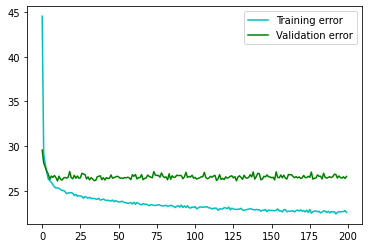

In [79]:
# Matches final model code, confirms that running for extra iterations doesn't lead to a better validation error

plt.plot(range(200), history.history['mean_absolute_error'], color='c', label='Training error')
plt.plot(range(200), history.history['val_mean_absolute_error'], color='g', label='Validation error')
plt.legend()

plt.show()

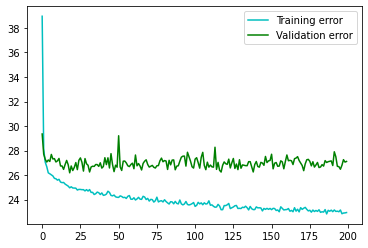

In [74]:
# DON'T RERUN THIS CELL TO MAINTAIN GRAPH
# Adam optimizer, regularization

plt.plot(range(200), history.history['mean_absolute_error'], color='c', label='Training error')
plt.plot(range(200), history.history['val_mean_absolute_error'], color='g', label='Validation error')
plt.legend()

plt.show()

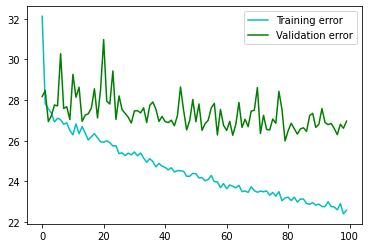

In [55]:
# DON'T RERUN THIS CELL TO MAINTAIN GRAPH
# Dropout=0.2, no regularization

plt.plot(range(100), history.history['mean_absolute_error'], color='c', label='Training error')
plt.plot(range(100), history.history['val_mean_absolute_error'], color='g', label='Validation error')
plt.legend()

plt.show()

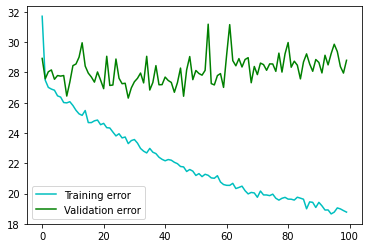

In [51]:
# DON'T RERUN THIS CELL TO MAINTAIN GRAPH
# Dropout=0.1, no regularization

plt.plot(range(100), history.history['mean_absolute_error'], color='c', label='Training error')
plt.plot(range(100), history.history['val_mean_absolute_error'], color='g', label='Validation error')
plt.legend()

plt.show()

In [80]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

23.949815517270352


# Task 3: Hyperparameter Selection

The final hyperparameters I selected are 200 neurons for the first layer of the network, ReLU activation, L2 regularization, the Adamax optimizer with a learning rate of 0.01. \\
* The reason I chose 200 neurons is because I wanted the model to be measure as much intricacies in the data as possible, but I was worried about having too many and making the layer redundant. In previous neural networks, I used 100 neurons per layer, but since I have lots of features in this data, I decided to increase that number to 200.
* I chose ReLU activation because I didn't want to lose too much data with other activation functions (sigmoid, etc.) due to the problem being a linear regression problem, but I also know that ReLU is generally considered essential in neural networks.
* I decided to use L2 regularization because I noticed overfitting in my model, and I know that regularization is meant to combat that. However, in my case, it didn't provide much of an impact.
* I used the Adamax optimizer because of my success with it in previous work. For this problem, I compared the Adamax with the Adam optimizer, and the Adamax optimizer performed, which was enough additional evidence for me to keep it.
* I used a learning rate of 0.01 because for complex problems 0.01 is generally considered a high learning rate, but I also tried a learning rate of 0.1 and didn't notice much of a (negative or positive) difference in the model performance. The only difference was that the training error would initially decrease at a lower rate then decrease at the same rate, and the validation error remained the same.

# Task 4: Random Forest Baseline Model

In [81]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
print(mean_absolute_error(y_test, regr.predict(X_test)))

22.354163530148274


Interestingly, the Random Forest Regression model performs better than the neural network, although only by a small amount. The final testing error for the neural network is ~24, while the final testing error for the random forest is ~22. My guess for why this is happening is two reasons:
1. The middle layer of the neural network may not have the best dimensions relative to the number of features in the data. An important part of a deep network learning is its ability to capture all the relationships between the features of the data, and this could require more weights for some problems and less for others. Since the data I'm using has a high dimensionality, the weights may not be capturing enough of the relationships or they could be capturing ones that are unimportant to the label.
2. The neural network is more complicated than the random forest, so its overfitting on the data. The training-validation error graphs show that the training error decreases in each iteration, but the validation error doesn't. This means that overfitting is in play, and although the random forest may not reach as low of a training error as the neural network, its acheiving a lower testing error in the end.